In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import json

# Crime Rate

In [ ]:
crime = pd.read_csv('../NYCDSA (Haystacks Data)/crime_rating_zipcode.csv', index_col = 0)
crime.head()

,census_state_abbr,census_zcta5_geoid,census_cbsa_geoid_count,census_cbsa_geoid_list,overall_crime_grade,violent_crime_grade,violent_crime_total_rate,violent_crime_assault_rate,violent_crime_robbery_rate,violent_crime_rape_rate,...,property_crime_arson_rate,other_crime_grade,other_crime_total_rate,other_crime_kidnapping_rate,other_crime_drug_crimes_rate,other_crime_vandalism_rate,other_crime_identity_theft_rate,other_crime_animal_cruelty_rate,crime_safety_paragraph,interpreting_crime_map_paragraph
13719,GA,30002,1,12060,D-,C,3.106,1.7060,1.0670,0.2545,...,0.1075,B+,5.987,0.1236,0.9456,3.981,0.8824,0.0542,The D- grade means the rate of crime is much h...,"When looking at the crime map for 30002, remem..."
13720,GA,30004,1,12060,C-,A-,1.553,0.9140,0.3858,0.2240,...,0.1017,A+,3.171,0.0404,0.7863,1.524,0.8159,0.0042,The C- grade means the rate of crime is slight...,"When looking at the crime map for 30004, remem..."
13721,GA,30005,1,12060,B+,A-,1.480,0.7977,0.4288,0.2256,...,0.1118,A+,2.709,0.0512,0.3942,1.394,0.8653,0.0041,The B+ grade means the rate of crime is lower ...,"When looking at the crime map for 30005, remem..."
13722,GA,30008,1,12060,D+,C,2.910,1.2040,1.3940,0.2531,...,0.0946,B-,7.648,0.0883,0.9090,5.777,0.8214,0.0522,The D+ grade means the rate of crime is higher...,"When looking at the crime map for 30008, remem..."
13723,GA,30009,1,12060,D-,A-,1.611,1.0460,0.2950,0.2294,...,0.1224,A,4.314,0.0453,0.8082,2.565,0.8910,0.0044,The D- grade means the rate of crime is much h...,"When looking at the crime map for 30009, remem..."


In [ ]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 726 entries, 13719 to 14444
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   census_state_abbr                  726 non-null    object 
 1   census_zcta5_geoid                 726 non-null    int64  
 2   census_cbsa_geoid_count            726 non-null    int64  
 3   census_cbsa_geoid_list             726 non-null    object 
 4   overall_crime_grade                726 non-null    object 
 5   violent_crime_grade                726 non-null    object 
 6   violent_crime_total_rate           726 non-null    float64
 7   violent_crime_assault_rate         726 non-null    float64
 8   violent_crime_robbery_rate         726 non-null    float64
 9   violent_crime_rape_rate            726 non-null    float64
 10  violent_crime_murder_rate          726 non-null    float64
 11  property_crime_grade               726 non-null    o

<AxesSubplot:>

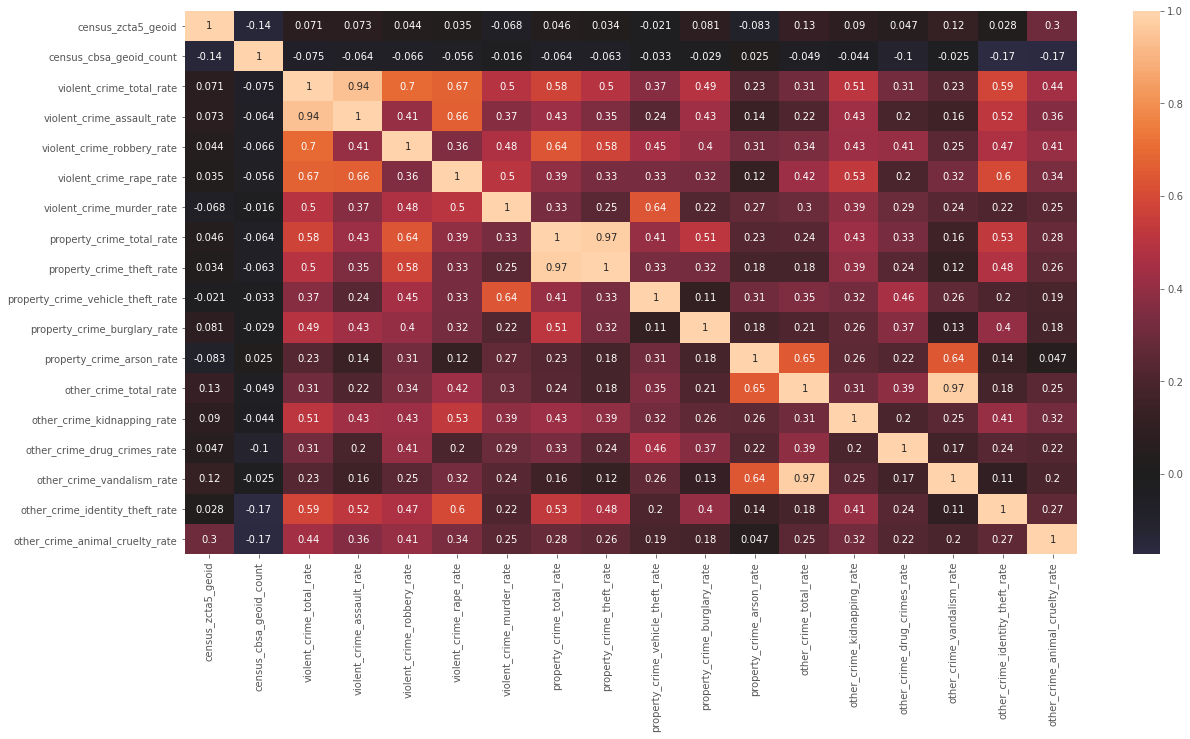

In [ ]:
corrs= crime.corr()
plt.figure(figsize=(20,10))  
sns.heatmap(corrs,annot=True, center=0)


In [ ]:
# the higher the grade, the lower the crime rate
crime.overall_crime_grade.value_counts()

D+    101
D-     91
C-     85
D      80
C+     77
C      74
F      59
B-     59
B      43
B+     25
A-     21
A      11
Name: overall_crime_grade, dtype: int64

In [ ]:
# zipcode is unique each row
len(crime.census_zcta5_geoid.unique())

726

In [ ]:
# drop categorical and highly correlated columns
crime = crime.drop(crime.columns[[0,2,3,4,5,11,17,24,25,7,21]], axis=1)
crime.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 726 entries, 13719 to 14444
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   census_zcta5_geoid                 726 non-null    int64  
 1   violent_crime_total_rate           726 non-null    float64
 2   violent_crime_robbery_rate         726 non-null    float64
 3   violent_crime_rape_rate            726 non-null    float64
 4   violent_crime_murder_rate          726 non-null    float64
 5   property_crime_total_rate          726 non-null    float64
 6   property_crime_theft_rate          726 non-null    float64
 7   property_crime_vehicle_theft_rate  726 non-null    float64
 8   property_crime_burglary_rate       726 non-null    float64
 9   property_crime_arson_rate          726 non-null    float64
 10  other_crime_total_rate             725 non-null    float64
 11  other_crime_kidnapping_rate        726 non-null    f

In [ ]:
crime.rename(columns = {'census_zcta5_geoid':'zip'}, inplace=True)
crime.head()

,zip,violent_crime_total_rate,violent_crime_robbery_rate,violent_crime_rape_rate,violent_crime_murder_rate,property_crime_total_rate,property_crime_theft_rate,property_crime_vehicle_theft_rate,property_crime_burglary_rate,property_crime_arson_rate,other_crime_total_rate,other_crime_kidnapping_rate,other_crime_drug_crimes_rate,other_crime_identity_theft_rate,other_crime_animal_cruelty_rate
13719,30002,3.106,1.0670,0.2545,0.0783,52.09,43.96,3.687,4.337,0.1075,5.987,0.1236,0.9456,0.8824,0.0542
13720,30004,1.553,0.3858,0.2240,0.0296,32.63,29.14,1.124,2.263,0.1017,3.171,0.0404,0.7863,0.8159,0.0042
13721,30005,1.480,0.4288,0.2256,0.0275,15.39,11.97,1.468,1.844,0.1118,2.709,0.0512,0.3942,0.8653,0.0041
13722,30008,2.910,1.3940,0.2531,0.0594,28.26,20.84,2.066,5.261,0.0946,7.648,0.0883,0.9090,0.8214,0.0522
13723,30009,1.611,0.2950,0.2294,0.0400,58.32,54.14,1.474,2.584,0.1224,4.314,0.0453,0.8082,0.8910,0.0044


In [ ]:
# fill in missing value in other_crime_total_rate
# crime = crime[['other_crime_total_rate']]
crime = crime.interpolate(method='linear')
crime.iloc[14233,:]

zip                                  31314.0000
violent_crime_total_rate                34.3900
violent_crime_robbery_rate               3.3300
violent_crime_rape_rate                  1.7060
violent_crime_murder_rate                0.5079
property_crime_total_rate              171.6000
property_crime_theft_rate              132.9000
property_crime_vehicle_theft_rate        3.4700
property_crime_burglary_rate            35.1900
property_crime_arson_rate                0.1118
other_crime_total_rate                  10.4310
other_crime_kidnapping_rate              2.5680
other_crime_drug_crimes_rate             0.2517
other_crime_identity_theft_rate          3.0550
other_crime_animal_cruelty_rate          0.2293
Name: 14233, dtype: float64

### Keep only zipcode and total crime rate

In [ ]:
crime_clean = crime[['zip','violent_crime_total_rate','property_crime_total_rate','other_crime_total_rate']]
crime_clean

,zip,violent_crime_total_rate,property_crime_total_rate,other_crime_total_rate
13719,30002,3.106,52.09,5.987
13720,30004,1.553,32.63,3.171
13721,30005,1.480,15.39,2.709
13722,30008,2.910,28.26,7.648
13723,30009,1.611,58.32,4.314
...,...,...,...,...
14440,39870,3.530,17.87,19.700
14441,39877,2.460,15.87,4.353
14442,39885,4.487,13.98,4.569
14443,39886,2.553,20.02,14.850


## Cleaned House Dataset
#### Nimit's dataset

In [ ]:
clean_house = pd.read_csv('clean_df.csv', index_col=0)
clean_house.head()

,rentZestimate,zestimate,livingArea,bathrooms,bedrooms,yearBuilt,price_x,address,city,state,...,parking,hasWaterfrontView,lotSize,architecturalStyle,structureType,appliances,communityFeatures,propertyCondition,utilities,url
zpid,,,,,,,,,,,,,,,,,,,,,
2064281489,2175.41,347514.00,2103.0,2.0,4.0,2020.0,339900.0,101 College Street,Kingsland,Georgia,...,2.0,NaN,0.45 Acres,Other,NaN,"['Some Electric Appliances', 'Dishwasher', 'Di...","['Street Lights', 'Sidewalks', 'Walk to School']",NaN,"['Cable Available', 'Sewer Available', 'Sewer ...",/homedetails/101-College-St-Kingsland-GA-31548...
91030716,2600.00,325200.00,2269.0,3.0,5.0,2004.0,305000.0,169 School House Creek Drive,Saint Marys,Georgia,...,0.0,NaN,"7,840 sqft",Traditional,House,"['Dishwasher', 'Oven/Range (Combo)', 'Refriger...","['Sidewalks', 'Street Lights']",Resale,"['Underground Utilities', 'Cable Available', '...",/homedetails/169-School-House-Creek-Dr-Saint-M...
111242225,1999.00,340500.00,1846.0,2.0,3.0,2004.0,320000.0,1621 Sandpiper Court,Saint Marys,Georgia,...,2.0,NaN,"8,276 sqft",Patio Home,NaN,"['Dryer', 'Dishwasher', 'Disposal', 'Microwave...","['Boat Facilities', 'Gated', 'Park', 'Street L...",NaN,"['Sewer Available', 'Sewer Connected', 'Underg...",/homedetails/1621-Sandpiper-Ct-Saint-Marys-GA-...
2090936200,1999.00,326164.00,1953.0,2.0,3.0,2018.0,0.0,346 Laurel Landing Boulevard,Kingsland,Georgia,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/homedetails/346-Laurel-Landing-Blvd-Kingsland...
2064330080,1939.51,365974.43,1835.0,2.0,3.0,2022.0,369900.0,81 Ossabaw Way,Waverly,Georgia,...,2.0,NaN,1.21 Acres,Traditional,House,"['Dishwasher', 'Microwave', 'Oven/Range (Combo...","['Clubhouse', 'Gated', 'Golf', 'Lake', 'Fitnes...",New Construction,"['Electricity Available', 'Water Available']",/homedetails/81-Ossabaw-Way-Waverly-GA-31565/2...


In [ ]:
clean_house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4611 entries, 2064281489 to 112002830
Data columns (total 52 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   rentZestimate              4611 non-null   float64
 1   zestimate                  4611 non-null   float64
 2   livingArea                 4611 non-null   float64
 3   bathrooms                  4611 non-null   float64
 4   bedrooms                   4611 non-null   float64
 5   yearBuilt                  4611 non-null   float64
 6   price_x                    4608 non-null   float64
 7   address                    4611 non-null   object 
 8   city                       4611 non-null   object 
 9   state                      4611 non-null   object 
 10  zip                        4611 non-null   int64  
 11  latitude                   4611 non-null   float64
 12  longitude                  4611 non-null   float64
 13  census_state_name          4611 no

In [ ]:
clean_house.iloc[[6,]]

,rentZestimate,zestimate,livingArea,bathrooms,bedrooms,yearBuilt,price_x,address,city,state,...,parking,hasWaterfrontView,lotSize,architecturalStyle,structureType,appliances,communityFeatures,propertyCondition,utilities,url
zpid,,,,,,,,,,,,,,,,,,,,,
2073578187,2226.0,356100.0,2117.0,2.0,3.0,2021.0,340000.0,107 Ryan Nicholas Drive,Kingsland,Georgia,...,0.0,NaN,"10,018 sqft",Other,Garden/Patio Home,"['Electric Water Heater', 'Dishwasher', 'Ice M...","['Clubhouse', 'Pool']",Resale,"['Cable Available', 'Sewer Connected', 'Electr...",/homedetails/107-Ryan-Nicholas-Dr-Kingsland-GA...


In [ ]:
### Left joined average zipcode crime rate on clean_df

In [ ]:
clean_df2 = clean_house.merge(crime_clean, how='left', on='zip')

,rentZestimate,zestimate,livingArea,bathrooms,bedrooms,yearBuilt,price_x,address,city,state,...,architecturalStyle,structureType,appliances,communityFeatures,propertyCondition,utilities,url,violent_crime_total_rate,property_crime_total_rate,other_crime_total_rate
0,2175.41,347514.00,2103.0,2.0,4.0,2020.0,339900.0,101 College Street,Kingsland,Georgia,...,Other,NaN,"['Some Electric Appliances', 'Dishwasher', 'Di...","['Street Lights', 'Sidewalks', 'Walk to School']",NaN,"['Cable Available', 'Sewer Available', 'Sewer ...",/homedetails/101-College-St-Kingsland-GA-31548...,3.523,14.37,6.365
1,2600.00,325200.00,2269.0,3.0,5.0,2004.0,305000.0,169 School House Creek Drive,Saint Marys,Georgia,...,Traditional,House,"['Dishwasher', 'Oven/Range (Combo)', 'Refriger...","['Sidewalks', 'Street Lights']",Resale,"['Underground Utilities', 'Cable Available', '...",/homedetails/169-School-House-Creek-Dr-Saint-M...,3.685,32.40,6.815
2,1999.00,340500.00,1846.0,2.0,3.0,2004.0,320000.0,1621 Sandpiper Court,Saint Marys,Georgia,...,Patio Home,NaN,"['Dryer', 'Dishwasher', 'Disposal', 'Microwave...","['Boat Facilities', 'Gated', 'Park', 'Street L...",NaN,"['Sewer Available', 'Sewer Connected', 'Underg...",/homedetails/1621-Sandpiper-Ct-Saint-Marys-GA-...,3.685,32.40,6.815
3,1999.00,326164.00,1953.0,2.0,3.0,2018.0,0.0,346 Laurel Landing Boulevard,Kingsland,Georgia,...,NaN,NaN,NaN,NaN,NaN,NaN,/homedetails/346-Laurel-Landing-Blvd-Kingsland...,3.523,14.37,6.365
4,1939.51,365974.43,1835.0,2.0,3.0,2022.0,369900.0,81 Ossabaw Way,Waverly,Georgia,...,Traditional,House,"['Dishwasher', 'Microwave', 'Oven/Range (Combo...","['Clubhouse', 'Gated', 'Golf', 'Lake', 'Fitnes...",New Construction,"['Electricity Available', 'Water Available']",/homedetails/81-Ossabaw-Way-Waverly-GA-31565/2...,5.438,13.98,7.125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4606,1900.00,421500.00,2000.0,2.0,3.0,2004.0,399900.0,253 Easley Road,Tignall,Georgia,...,Cabin,NaN,"['Electric Range', 'Refrigerator']",['Other'],NaN,NaN,/homedetails/253-Easley-Rd-Tignall-GA-30668/11...,5.649,13.49,8.951
4607,2049.00,350100.00,4003.0,4.0,4.0,1817.0,335000.0,205 S Alexander Avenue,Washington,Georgia,...,Other,House,"['Electric Water Heater', 'Cooktop', 'Dishwash...",['None'],Resale,"['Cable Available', 'Sewer Connected', 'Electr...",/homedetails/205-S-Alexander-Ave-Washington-GA...,2.912,32.71,11.700
4608,3599.00,384523.00,3808.0,4.0,5.0,1828.0,425000.0,309 S Alexander Avenue,Washington,Georgia,...,Other,House,"['Dishwasher', 'Oven/Range (Combo)', 'Refriger...",['None'],Updated/Remodeled,"['Sewer Available', 'Water Available']",/homedetails/309-S-Alexander-Ave-Washington-GA...,2.912,32.71,11.700
4609,3599.00,329800.00,4113.0,3.0,5.0,1895.0,320000.0,0 Danburg Road #8931323,Tignall,Georgia,...,Colonial,House,['Dishwasher'],['None'],Resale,"['Electricity Available', 'Phone Available']",/homedetails/6464-Danburg-Rd-Tignall-GA-30668/...,5.649,13.49,8.951
